<a href="https://colab.research.google.com/github/AaronSanchezBelber/Capstone_Repository/blob/master/Real_State_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. TARGETS:
- Which is the most expensive state?
- Which state has the highgest square meters density?
- What is the price growth of each city?
- Which city will be the most expensive in 2023
- In which month are there more home sales in the USA?
- Exist gentrification in Manhattan?
- Where can my mum buy a house? in NY**


0.1 STEPS:
- 1. Importing libreries and data
- 2. Cleaning the data set
- 3. Exploratory analisis 

1. Importing libreries and data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install geopandas
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Polygon

!pip install geopy
from geopy.geocoders import Nominatim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
real_state_usa = pd.read_csv('/content/drive/MyDrive/PROYECTOS PROPIOS/RealState_USA/Realstate_USA.csv', sep=',')
df_real_state_usa = pd.DataFrame(real_state_usa)
df_real_state_usa

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
923154,for_sale,445000.0,1.0,2.0,0.99,"1008 King St, Chappaqua, NY, 10514",1008 King St,Chappaqua,New York,10514.0,1052.0,2011-05-09
923155,for_sale,418000.0,4.0,2.0,0.40,"3 Elmwood Dr, Monroe, NY, 10950",3 Elmwood Dr,Monroe,New York,10950.0,1650.0,2015-07-21
923156,for_sale,469000.0,4.0,2.0,0.18,"13 N Conger Ave, Congers, NY, 10920",13 N Conger Ave,Congers,New York,10920.0,2123.0,NaN
923157,for_sale,825000.0,5.0,5.0,0.79,"7 Miller Rd, Valley Cottage, NY, 10989",7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,2010-06-02


2. Cleaning data without NaN and weird values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date


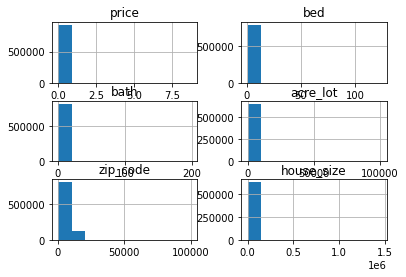

In [ ]:
df_real_state_usa.describe(include='all')

df_real_state_usa.info()

df_real_state_usa.isnull().sum()

df_real_state_usa.hist()

df_real_state_usa['bed'].fillna(3, inplace=True)
df_real_state_usa['bath'].fillna(2, inplace=True)
df_real_state_usa['price'].fillna(df_real_state_usa['price'].std(), inplace=True)
df_real_state_usa['house_size'].fillna(df_real_state_usa['house_size'].std(), inplace=True)
df_real_state_usa['acre_lot'].fillna(df_real_state_usa['acre_lot'].std(), inplace=True)

df_real_state_usa['street'].fillna('Nada', inplace=True)
df_real_state_usa['zip_code'].fillna('Nada', inplace=True)
df_real_state_usa['city'].fillna('Nada', inplace=True)
df_real_state_usa['sold_date'].fillna('Nada', inplace=True)

df_real_state_usa.isnull().sum()

df_real_state_usa[df_real_state_usa.duplicated(keep=False)]
df_real_state_usa.drop_duplicates(inplace=True)
df_real_state_usa[df_real_state_usa.duplicated(keep=False)]


3. Exploratory analisis

Which is the most expensive state?
- Expensive for the gross sales
- I will do a map of the state 

In [ ]:
df_real_state_usa[['price', 'house_size']]
square_meter = 10.7639 
df_real_state_usa['house_size'] = df_real_state_usa['house_size'] / square_meter
df_real_state_usa[['house_size']]
df_real_state_usa['price_square_meter'] = df_real_state_usa['price'] / df_real_state_usa['house_size']
df_real_state_usa[['price_square_meter']]

,price_square_meter
0,1228.488587
1,563.924034
2,964.146123
3,867.091944
4,230.503510
...,...
923135,8149.527594
923136,4617.333756
923144,7695.392425
923146,10170.701316


In [ ]:
df_real_state_usa['state'].value_counts()
df_real_state_usa.drop(df_real_state_usa[df_real_state_usa['state'] == 'Virginia'].index, inplace=True)
df_real_state_usa.drop(df_real_state_usa[df_real_state_usa['state'] == 'Georgia'].index, inplace=True)
df_real_state_usa.drop(df_real_state_usa[df_real_state_usa['state'] == 'Wyoming'].index, inplace=True)
df_real_state_usa.drop(df_real_state_usa[df_real_state_usa['state'] == 'South Carolina'].index, inplace=True)
df_real_state_usa.drop(df_real_state_usa[df_real_state_usa['state'] == 'Tennessee'].index, inplace=True)
df_real_state_usa.drop(df_real_state_usa[df_real_state_usa['state'] == 'West Virginia'].index, inplace=True)
df_real_state_usa.groupby(['state'])['price_square_meter'].mean().sort_values(ascending=False)

state
New York          8294.945798
Massachusetts     4665.050021
Rhode Island      3012.325449
Connecticut       2695.007499
New Jersey        2675.724142
Virgin Islands    2594.046912
Puerto Rico       2580.076309
Pennsylvania      2467.658652
New Hampshire     2194.480311
Vermont           1943.017323
Delaware          1870.492182
Maine             1705.657948
Name: price_square_meter, dtype: float64

Colecting new data

In [ ]:
#With this code you can obtain the coordinates into the dataframe from the adres, state, city.
#Colab will not support it.
#geolocator = Nominatim(user_agent="specify_your_app_name_here")

#for i in df_real_state_usa.index:
  #try:
    #location = geolocator.geocode(df_real_state_usa['state'][i])
    
    #df_real_state_usa.loc[i, 'la'] = location.latitude
    #df_real_state_usa.loc[i, 'lo'] = location.longitude

  #except:
    #df_real_state_usa.loc[i, 'la'] = ' '
    #df_real_state_usa.loc[i, 'lo'] = ' '

In [ ]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
for i in df_real_state_usa['state'].unique():
  location = geolocator.geocode(i)
len(states_list)
cordinates_list = [(18.2247706, -66.4858295), (17.789187, -64.7080574), (42.3788774, -72.032366), (41.6500201, -72.7342163), (43.4849133, -71.6553992), (44.5990718, -72.5002608), (40.0757384, -74.4041622), (40.7127281, -74.0060152), (41.7962409, -71.5992372), (45.709097, -68.8590201), (40.9699889, -77.7278831), (38.6920451, -75.4013315)]
d = dict(zip(states_list, cordinates_list))
df_coordiantes = pd.DataFrame(d).T
df_small = df_coordiantes.sort_index(ascending=True)
states_area = [5544,1954,35387,10555,9351,8722,54475,46058,3515,1545,9615,133]
states_area
states_area = pd.DataFrame(states_area, index=None)
states_area.rename(columns = {0:'Area_miles-2'}, inplace = True)
states_area.reset_index(drop=True)
df_small = df_small.rename(columns={0: 'latitude', 1: 'longitude'}).reset_index()
df_small['Area_miles-2'] = states_area
state_code = ['CT','DE','ME','MA','NH','NJ','NY','PA','PU','RI','VT','VI']
df_small['code'] = state_code
df_small

,index,latitude,longitude,Area_miles-2,code
0,Connecticut,41.650020,-72.734216,5544,CT
1,Delaware,38.692045,-75.401331,1954,DE
2,Maine,45.709097,-68.859020,35387,ME
3,Massachusetts,42.378877,-72.032366,10555,MA
4,New Hampshire,43.484913,-71.655399,9351,NH
5,New Jersey,40.075738,-74.404162,8722,NJ
6,New York,40.712728,-74.006015,54475,NY
7,Pennsylvania,40.969989,-77.727883,46058,PA
8,Puerto Rico,18.224771,-66.485829,3515,PU
9,Rhode Island,41.796241,-71.599237,1545,RI


In [ ]:
from shapely.geometry import Point

In [ ]:
df_small['geometry'] = [Point(xy) for xy in zip(df_small.longitude, df_small.latitude)]
df_small

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



,index,latitude,longitude,Area_miles-2,code,geometry
0,Connecticut,41.650020,-72.734216,5544,CT,POINT (-72.7342163 41.6500201)
1,Delaware,38.692045,-75.401331,1954,DE,POINT (-75.4013315 38.6920451)
2,Maine,45.709097,-68.859020,35387,ME,POINT (-68.8590201 45.709097)
3,Massachusetts,42.378877,-72.032366,10555,MA,POINT (-72.032366 42.3788774)
4,New Hampshire,43.484913,-71.655399,9351,NH,POINT (-71.6553992 43.4849133)
5,New Jersey,40.075738,-74.404162,8722,NJ,POINT (-74.4041622 40.0757384)
6,New York,40.712728,-74.006015,54475,NY,POINT (-74.0060152 40.7127281)
7,Pennsylvania,40.969989,-77.727883,46058,PA,POINT (-77.7278831 40.9699889)
8,Puerto Rico,18.224771,-66.485829,3515,PU,POINT (-66.4858295 18.2247706)
9,Rhode Island,41.796241,-71.599237,1545,RI,POINT (-71.5992372 41.7962409)


In [ ]:
!pip install geopandas
import pyproj


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(df_small,
                    locations='code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Area_miles-2',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()
fig.update_layout(
      title_text = 'Jan 2022 Median Housing Price by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")

for i in df_real_state_usa.index:
  try:
    location = geolocator.geocode(df_real_state_usa['state'][i])
    
    df_real_state_usa.loc[i, 'la'] = location.latitude
    df_real_state_usa.loc[i, 'lo'] = location.longitude

  except:
    df_real_state_usa.loc[i, 'la'] = ' '
    df_real_state_usa.loc[i, 'lo'] = ' '

In [ ]:
def separador (dataset):
  columnas_numericas = []
  for i in dataset:
    if dataset[i].dtype.kind == 'f':
      columnas_numericas.append(i)

  return columnas_numericas
columnas_numericas = separador(df_real_state_usa)
columnas_numericas